<a href="https://colab.research.google.com/github/VerasDanilo/sigmoidal_data_science/blob/main/Projeto_Airbnb_Bruxelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Bruxelas*

  O [Airbnb](https://https://www.airbnb.com/) é uma plataforma que permite que pessoas do mundo inteiro ofereçam suas casas como **hospedagem para usuários que buscam acomodações por temporada**. Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática.

  Fundada em 2007, a plataforma conta com **4 milhões de anfitriões** que já receberam mais de **1,4 bilhão de hóspedes** em quase todos os países do mundo. Sendo considerada como **a maior empresa hoteleira da atualidade**.

  Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Bruxelas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtencão dos Dados

Os dados usados para o projeto foram obtidos no site [Inside Airbnb](http://insideairbnb.com/get-the-data/).

Para esta análise exploratória inicial, será baixado apenas o arquivo:


*   `listings.csv` - *Summary information and metrics for listings in Brussels (good for visualisations).*

**Importante:** Devido à constante atualização do portal, pode ser que o arquivo exato utilizado nesse notebook não esteja mais disponível, o que quebraria o nosso código.



In [1]:
# Importar os pacotes necessários:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importar o arquivo listings.csv para um DataFrame:
df = pd.read_csv("http://data.insideairbnb.com/belgium/bru/brussels/2022-12-24/visualisations/listings.csv")

## Análise dos Dados

O objetivo desta etapa é de nos situar para que possamos entender como os dados são estruturados. 

**Dicionário das variáveis**


* `id` - número de identificação do anúncio;
* `name` - nome do anúncio;
* `host_id` - número de identificação do anfitrião;
* `host_name` - nome do anfitrião;
* `neighbourhood_group` - esta coluna não contém nenhum valor válido;
* `neighbourhood` - nome do bairro;
* `latitude` - coordenada de latitude do imóvel;
* `longitude` - coordenada de longitude do imóvel;
* `room_type` - tipo de imóvel;
* `price` - preço da diária em moeda local;
* `minimum_nights` - quantidade mínima de noites para reservar;
* `number_of_reviews` - quantidade total de avaliações;
* `last_review` - última avaliação;
* `reviews_per_month` - quantidade de avaliações por mês;
* `number_of_reviews_ltm` - quantidade de avaliações nos ultimos 12 mêses;
* `calculated_host_listings_count` - quantidade de anuncios do mesmo anfitrião;
* `availability_365` - número de dias de disponibilidade nos próximos 365 dias.
* `license` - esta coluna não contém nenhum valor válido.





Antes de iniciar qualquer análise, devemos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# Exibir as 5 primeiras entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85702,4.30771,Entire home/apt,98,2,22,2022-11-26,0.21,2,321,4,NaN
1,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,74,5,110,2022-12-19,0.76,1,233,5,NaN
2,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85709,4.30757,Entire home/apt,84,2,6,2022-11-14,0.07,2,323,4,NaN
3,45026,Apartment raised basement,198732,Christine,NaN,Saint-Gilles,50.82677,4.34987,Entire home/apt,65,1,18,2017-05-09,0.12,1,350,0,NaN
4,48180,in renewal,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200,2,0,NaN,NaN,1,365,0,NaN


### **Q1. Quantas variáveis e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [4]:
# Identificar o volume de dados do dataframe:
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

# Verificar as 5 primeiras entradas do dataset:
display(df.dtypes)

Entradas: 5844
Variáveis: 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `license` e `neighbourhood_group` possuem 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos menores que 15%.

In [5]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.135181
last_review                       0.135181
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, iremos plotar o histograma.

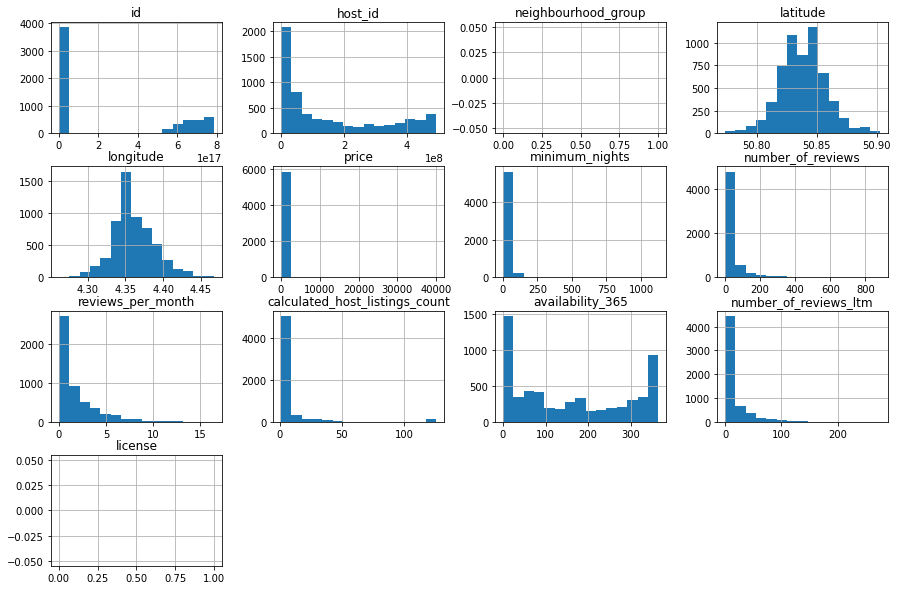

In [6]:
# Plotar o histograma das variáveis numéricas:
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Observe, por exemplo, as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*: 

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
# Ver o resumo estatístico das variáveis numéricas:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,calculated_host_listings_count,availability_365
count,5844.000000,5844.000000,5844.000000,5054.000000,5844.000000,5844.000000,5844.000000
mean,129.776010,10.121150,39.226899,1.783360,13.946270,7.247775,157.827173
std,659.440544,34.757004,77.159138,2.049366,22.129584,19.336395,134.385073
min,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000
25%,60.000000,1.000000,2.000000,0.350000,0.000000,1.000000,24.000000
50%,85.000000,2.000000,11.000000,1.000000,4.000000,1.000000,137.000000
75%,127.000000,5.000000,40.000000,2.510000,18.000000,4.000000,299.000000
max,40000.000000,1125.000000,885.000000,16.470000,276.000000,126.000000,365.000000


Analisando o resumo estatístico acima, podemos afirmar que:


*   75% dos preços (`price`) dos imóveis está baixo de 127 euros. Porém, o valor máximo é de 4000 euros. 
*   A quantidade mínima de noites (`minimum_nights`) pode ultrapassar os 3 anos.



### Boxplot para minimum_nights

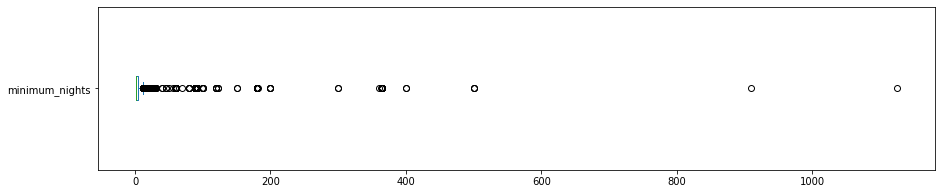

minimum nights: valores acima de 30
299 entradas
5.1164%


In [37]:
# Boxplot:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 30 dias para minimum_nights:
print("minimum nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para price

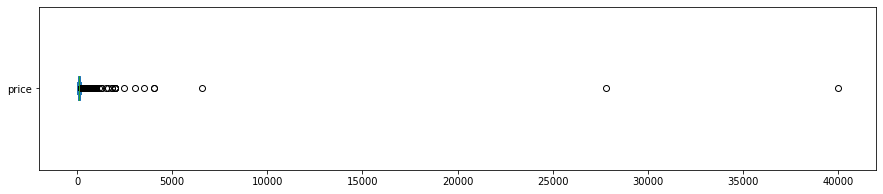


price: valores acima de 1000
21 entradas
0.3593%


In [38]:
# Boxplot:
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Ver quantidade de valores acima de 1000 para price:
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Como identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos limpar o *DataFrame* delas e plotar novamente o histograma.

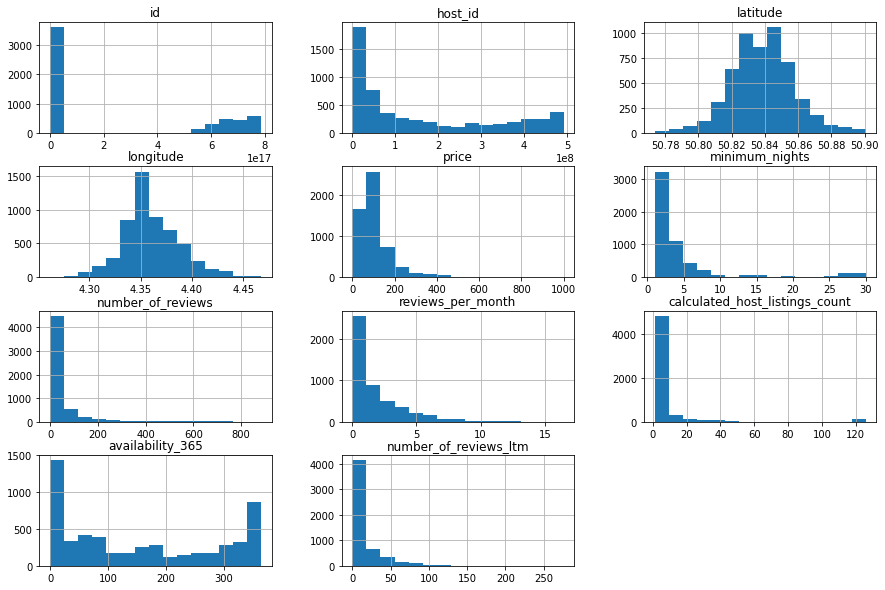

In [39]:
# Remover os outliers em um novo DataFrame:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remover 'license' e 'neighbourhood_group', pois estão vazios:
df_clean.drop('license', axis=1, inplace=True)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar o histograma para as variáveis numéricas:
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Vamos avaliar se existe alguma relação entre as variáveis, utilizando o coeficiente de correlação. Que, além de medir, ele estabelece qual é a intensidade dessa realação. 
Para identificar essas correlações existentes, iremos:


*   Criar uma matriz de correlação;
*   Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.




In [40]:
# Criar uma matriz de correlação:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.125874,-0.032919,-0.005949,0.331619,0.184247,-0.000045
minimum_nights,-0.125874,1.000000,-0.139010,-0.254065,0.017868,-0.052162,-0.216739
number_of_reviews,-0.032919,-0.139010,1.000000,0.474774,-0.031133,0.034179,0.679839
reviews_per_month,-0.005949,-0.254065,0.474774,1.000000,-0.035800,0.132043,0.749683
calculated_host_listings_count,0.331619,0.017868,-0.031133,-0.035800,1.000000,-0.002162,-0.004143
availability_365,0.184247,-0.052162,0.034179,0.132043,-0.002162,1.000000,0.082925
number_of_reviews_ltm,-0.000045,-0.216739,0.679839,0.749683,-0.004143,0.082925,1.000000


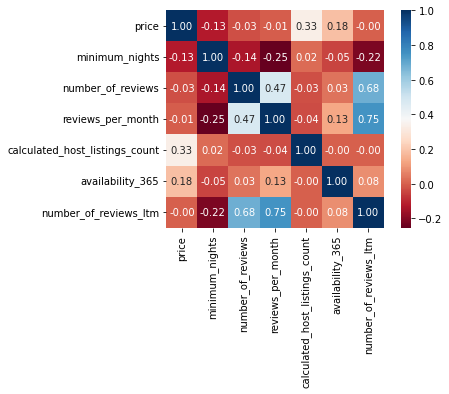

In [41]:
# Criar heatmap da matriz:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

É possível observar uma correlação entre as variáveis `number_of_reviews`, `reviews_per_month` e `number_of_reviews_ltm`. Que já era de se esperar, pois todas essas variáveis referem-se à quantidade de reviews em intervalos de tempo diferentes.

Porém, de acordo com nossa matriz, existe uma correlação positiva (mesmo que fraca) entre `price` e `calculated_host_listings_ltm`. O que indica que o valor dos imóveis pode ser proporcional à quantidade de anuncios do anfitrião. Mas, seria necessário um estudo mais profundo para fazer essa afirmação.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. No site, existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [42]:
# Mostrar a quantidade de cada tipo de imóvel disponível:
df_clean.room_type.value_counts()

Entire home/apt    4054
Private room       1417
Hotel room           34
Shared room          24
Name: room_type, dtype: int64

In [43]:
# Mostrar a porcentagem de cada tipo de imóvel disponível:
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    73.322481
Private room       25.628504
Hotel room          0.614939
Shared room         0.434075
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Bruxelas?**

Uma maneira de  verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [44]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Bruxelles                137.743985
Berchem-Sainte-Agathe    133.034483
Woluwe-Saint-Pierre      117.758621
Ixelles                  110.825688
Saint-Josse-ten-Noode    106.645161
Saint-Gilles             106.551895
Anderlecht               105.886207
Koekelberg               105.627451
Uccle                    103.567944
Watermael-Boitsfort      100.897436
Name: price, dtype: float64

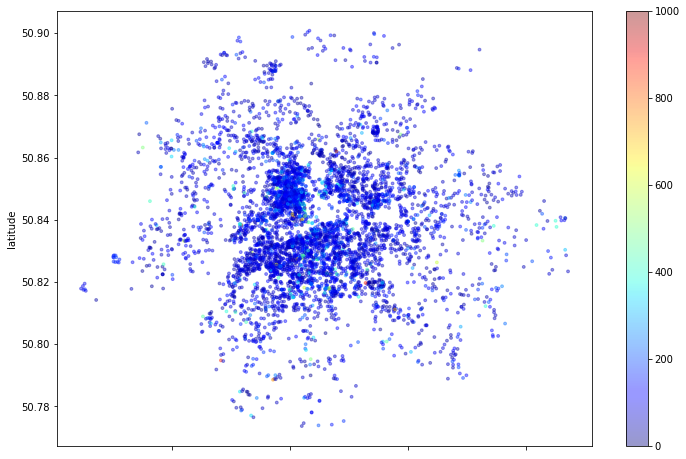

In [46]:
# Plotar os imóveis pela latitude e longitude:

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Apenas com uma análise superficial, já foi possível ver que temos *outliers* em algumas variáveis.

Foi  necessário limpar o *dataframe*, pois alguns anfitriões inserem o valor total da estadia ao invés de inserir apenas o preço da diária. E, nesse caso, quando temos uma quantidade minima de noites muito alta, o preço do imóvel desse anúncio pode puxar o preço médio da região para cima, nos fazendo tirar conclusões incorretas a respeito de localidades mais caras ou baratas.

Por fim, é necessário lembrar que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomendo que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.